# Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

#### Instructions:
1) Load the dataset and explore the variables.

2) We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

3) Extract the target variable.

4) Extract the independent variables and scale them.

5) Build the logistic regression model.

6) Evaluate the model.

7) Even a simple model will give us more than 70% accuracy. Why?

8) Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

9) Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

#### Instructions:

1) Load the dataset and explore the variables.

In [2]:
df = pd.read_csv('files_for_lab/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# account_id is important for the predictions, but i won't use it as a feature (unique values)
df.set_index('customerID', inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [7]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x.strip().replace("","0")))
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df.dtypes

gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,18947571.77
std,24.56,30.09,22090528.90
min,0.00,18.25,0.00
25%,9.00,35.50,309080.05
50%,29.00,70.35,10309040.05
75%,55.00,89.85,30708065.01
max,72.00,118.75,80608040.08


In [9]:
# Check the consistency of categorical values

for col in df.select_dtypes(exclude="number").columns.tolist():
    if col == 'customerID':
        continue
    print("Unique entires for", col, "are:", df[col].unique())

Unique entires for gender are: ['Female' 'Male']
Unique entires for SeniorCitizen are: [False  True]
Unique entires for Partner are: ['Yes' 'No']
Unique entires for Dependents are: ['No' 'Yes']
Unique entires for PhoneService are: ['No' 'Yes']
Unique entires for MultipleLines are: ['No phone service' 'No' 'Yes']
Unique entires for InternetService are: ['DSL' 'Fiber optic' 'No']
Unique entires for OnlineSecurity are: ['No' 'Yes' 'No internet service']
Unique entires for OnlineBackup are: ['Yes' 'No' 'No internet service']
Unique entires for DeviceProtection are: ['No' 'Yes' 'No internet service']
Unique entires for TechSupport are: ['No' 'Yes' 'No internet service']
Unique entires for StreamingTV are: ['No' 'Yes' 'No internet service']
Unique entires for StreamingMovies are: ['No' 'Yes' 'No internet service']
Unique entires for Contract are: ['Month-to-month' 'One year' 'Two year']
Unique entires for PaperlessBilling are: ['Yes' 'No']
Unique entires for PaymentMethod are: ['Electronic c

In [10]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts(), '\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     2810
Yes                    2707
No internet service    15

In [11]:
df['Churn'].value_counts() # after filtering and removing NaNs, check for balance

No     5174
Yes    1869
Name: Churn, dtype: int64

Class Imbalance DETECTED! I like to deal with them at Feature Engineering.

### EDA

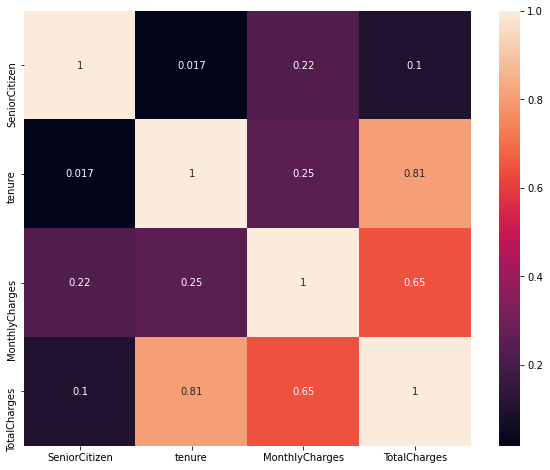

In [12]:
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

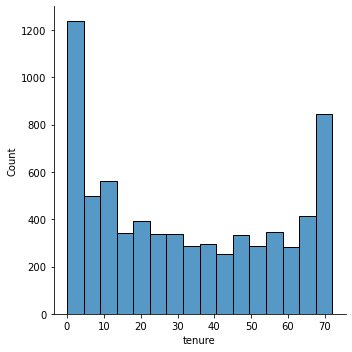

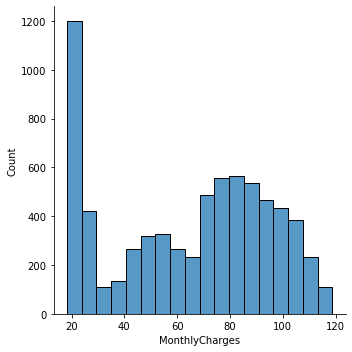

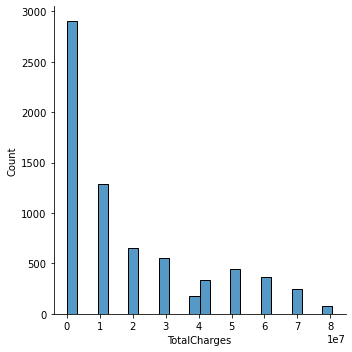

In [13]:
for col in df.select_dtypes(np.number):
    sns.displot(df[col])
    plt.show()

#### Instructions:

2) We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

3) Extract the target variable.

4) Extract the independent variables and scale them.

In [14]:
# X-y split

y = df['Churn']
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
X

,tenure,SeniorCitizen,MonthlyCharges
customerID,,,
7590-VHVEG,1,False,29.85
5575-GNVDE,34,False,56.95
3668-QPYBK,2,False,53.85
7795-CFOCW,45,False,42.30
9237-HQITU,2,False,70.70
...,...,...,...
6840-RESVB,24,False,84.80
2234-XADUH,72,False,103.20
4801-JZAZL,11,False,29.60


In [15]:
from scipy import stats

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

X_trans, _ci = boxcox_transform(X)
X_trans

,tenure,SeniorCitizen,MonthlyCharges
customerID,,,
7590-VHVEG,0.000000,False,23.578295
5575-GNVDE,8.796285,False,43.571734
3668-QPYBK,0.815814,False,41.332735
7795-CFOCW,10.300457,False,32.892530
9237-HQITU,0.815814,False,53.391036
...,...,...,...
6840-RESVB,7.177193,False,63.300009
2234-XADUH,13.299215,False,76.033726
4801-JZAZL,4.364654,False,23.388387


### Instructions:

5) Build the logistic regression model.

In [16]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

In [17]:
classification = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

#### Instructions:

6) Evaluate the model.

In [18]:
classification.score(X_test, y_test)

0.8019872249822569

In [19]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[956,  80],
       [199, 174]], dtype=int64)

In [20]:
pd.Series(predictions).value_counts()

No     1155
Yes     254
dtype: int64

In [21]:
y_test.value_counts()

No     1036
Yes     373
Name: Churn, dtype: int64

<AxesSubplot:>

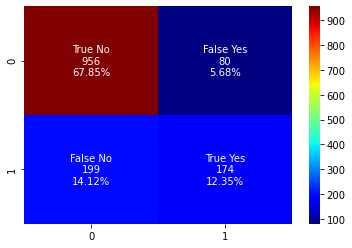

In [22]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='jet')

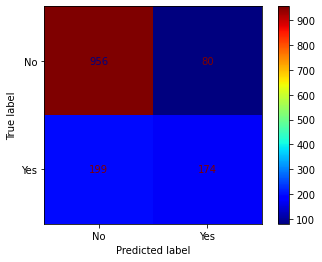

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='jet')
plt.show()

#### Instructions:

7) Even a simple model will give us more than 70% accuracy. Why?

In [24]:
# Churn data is very imbalanced, thereby training the classification model with a much higher number of 'No' values
# than of 'Yes' values. As a result, the model predicts 'No' rather accurately. In contrasts, the model predicts almost
# the same amount of fake 'Yes' values than of true 'Yes' value, as shown in the confusion matrix and the recall value.

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.69      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [25]:
# AUC ROC measures the probabilities over the decision of the correct class,
## so for the other metrics a wrong prediction 0.2 --> 1.0 = 0.49 --> 1.0,
## while for AUC ROC 0.49 would be considered a smaller mistake

roc_auc = metrics.roc_auc_score(np.where(y_test == 'Yes', 1, 0), np.where(predictions == 'Yes', 1, 0))
roc_auc

0.6946339292183796

#### Instructions:

8) Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [26]:
# X-y split

y = df['Churn']
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

# BoxCox transform

X_trans, _ci = boxcox_transform(X)

# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE() # initialize SMOTE object

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

No     4138
Yes    4138
Name: Churn, dtype: int64

In [27]:
classification = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=10000)
classification.fit(X_train_sm, y_train_sm)


LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [28]:
classification.score(X_test, y_test)

0.7402413058907026

In [29]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[748, 288],
       [ 78, 295]], dtype=int64)

In [30]:
pd.Series(predictions).value_counts()

No     826
Yes    583
dtype: int64

In [31]:
y_test.value_counts()

No     1036
Yes     373
Name: Churn, dtype: int64

<AxesSubplot:>

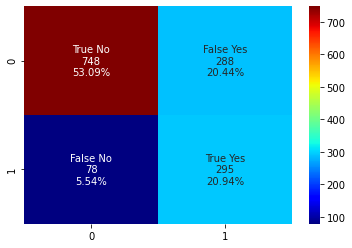

In [32]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='jet')

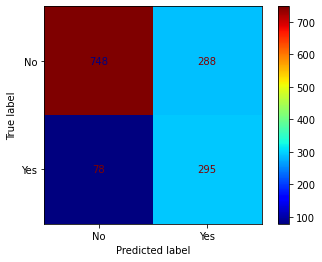

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='jet')
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# After banlancing Churn data with SMOTE, prediction of 'Yes' values has improved considerably, as shown by recall values

              precision    recall  f1-score   support

          No       0.91      0.72      0.80      1036
         Yes       0.51      0.79      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [35]:
# AUC ROC measures the probabilities over the decision of the correct class,
## so for the other metrics a wrong prediction 0.2 --> 1.0 = 0.49 --> 1.0,
## while for AUC ROC 0.49 would be considered a smaller mistake

roc_auc = metrics.roc_auc_score(np.where(y_test == 'Yes', 1, 0), np.where(predictions == 'Yes', 1, 0))
roc_auc

0.7564462202531907

#### Instructions:

9) Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [36]:
# X-y split

y = df['Churn']
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

# BoxCox transform

X_trans, _ci = boxcox_transform(X)

# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

# TOMEK Links

from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_train_tl, y_train_tl = tomek.fit_resample(X_train, y_train)
y_train_tl.value_counts()

# Tomek Links works better for smaller imbalances

No     3736
Yes    1496
Name: Churn, dtype: int64

In [37]:
classification = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=10000)
classification.fit(X_train_tl, y_train_tl)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [38]:
classification.score(X_test, y_test)

0.8026969481902059

In [39]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[927, 109],
       [169, 204]], dtype=int64)

In [40]:
pd.Series(predictions).value_counts()

No     1096
Yes     313
dtype: int64

In [41]:
y_test.value_counts()

No     1036
Yes     373
Name: Churn, dtype: int64

<AxesSubplot:>

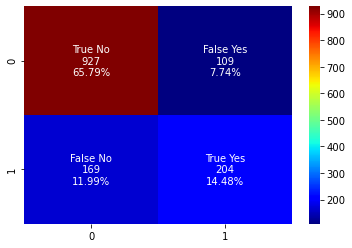

In [42]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='jet')

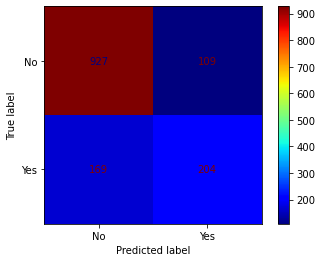

In [43]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='jet')
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# Banlancing Churn data with Tomek Links improves a tad the prediction of 'Yes' values, but nothing very spectacular
# Felipe recommends applying Tomek Links first, then SMOTE, and then maybe just another Tomek Links

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1036
         Yes       0.65      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [45]:
# AUC ROC measures the probabilities over the decision of the correct class,
## so for the other metrics a wrong prediction 0.2 --> 1.0 = 0.49 --> 1.0,
## while for AUC ROC 0.49 would be considered a smaller mistake

roc_auc = metrics.roc_auc_score(np.where(y_test == 'Yes', 1, 0), np.where(predictions == 'Yes', 1, 0))
roc_auc

0.7208522674340369